# Image Depth Estimation

> [Swift and Simple: Calculate Object Distance with ease in just few Lines of Code](https://medium.com/artificialis/swift-and-simple-calculate-object-distance-with-ease-in-just-few-lines-of-code-38889575bb12): Calculate object distance using monocular vision.
>
> By [Nabeel Khan](https://medium.com/@nbeel.original) @[Artificialis](https://medium.com/artificialis)

## Calculate Object Distance

In [ ]:
!pip install mediapipe

In [ ]:
import cv2 as cv
from glob import glob
import math
import matplotlib.pyplot as plt
import mediapipe as mp
import numpy as np

### Pose Estimation with MediaPipe

In [ ]:
mp_pose = mp.solutions.pose
pose = mp_pose.Pose()

In [130]:
test_images = glob('assets/*.jpg')

In [131]:
test_images

['assets/cyber_02.jpg',
 'assets/cyber_06.jpg',
 'assets/cyber_08.jpg',
 'assets/cyber_10.jpg',
 'assets/cyber_11.jpg',
 'assets/cyber_12.jpg']

In [132]:
image = plt.imread(test_images[3])

(-0.5, 2799.5, 1574.5, -0.5)

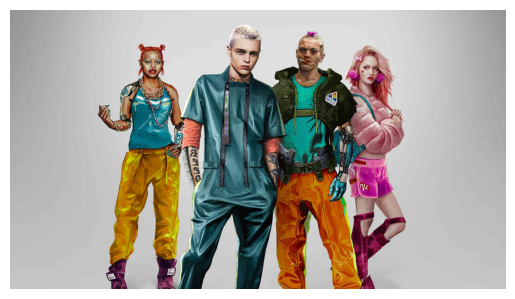

In [133]:
plt.imshow(image, cmap=plt.cm.binary)
plt.axis(False)

In [134]:
results = pose.process(image)
results.pose_landmarks

landmark {
  x: 0.61041665
  y: 0.14173122
  z: -0.03484062
  visibility: 0.9975148
}
landmark {
  x: 0.6200001
  y: 0.12622823
  z: -0.03620187
  visibility: 0.99509007
}
landmark {
  x: 0.64640254
  y: 0.16641696
  z: -0.036373828
  visibility: 0.99518317
}
landmark {
  x: 0.64978194
  y: 0.16309543
  z: -0.036616087
  visibility: 0.99497074
}
landmark {
  x: 0.6046166
  y: 0.13789424
  z: -0.02911348
  visibility: 0.9954062
}
landmark {
  x: 0.59908724
  y: 0.13992569
  z: -0.02900225
  visibility: 0.99513656
}
landmark {
  x: 0.59349
  y: 0.14168616
  z: -0.029304605
  visibility: 0.9948033
}
landmark {
  x: 0.6425276
  y: 0.14272134
  z: 0.02738896
  visibility: 0.99173295
}
landmark {
  x: 0.59022075
  y: 0.12797664
  z: 0.05795149
  visibility: 0.9950175
}
landmark {
  x: 0.6239519
  y: 0.1634148
  z: -0.0031905095
  visibility: 0.9938436
}
landmark {
  x: 0.6030827
  y: 0.16511087
  z: 0.0054637683
  visibility: 0.99475247
}
landmark {
  x: 0.67943615
  y: 0.23321864
  z: 0.041

(-0.5, 2799.5, 1574.5, -0.5)

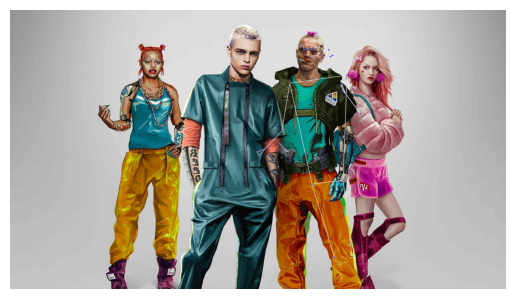

In [135]:
# draw detected body landmarks
mp_drawing = mp.solutions.drawing_utils
mp_drawing.draw_landmarks(image,results.pose_landmarks, mp_pose.POSE_CONNECTIONS)

plt.imshow(image, cmap=plt.cm.binary)
plt.axis(False)

![Image Depth Estimation](./assets/pose_landmark_index.webp)
(_Source: [MediaPipe](https://developers.google.com/mediapipe/solutions/vision/pose_landmarker)_)

In [136]:
# use the nose landmark for depth estimation
landmarks = []

for landmark in results.pose_landmarks.landmark:
    landmarks.append((landmark.x, landmark.y, landmark.z))
        
nose_landmark = landmarks[mp_pose.PoseLandmark.NOSE.value]
_,_, nose_z = nose_landmark

In [137]:
nose_landmark

(0.6104166507720947, 0.14173121750354767, -0.034840621054172516)

In [138]:
#Calculating distance from the z-axis
#Set the depth_scale to 1
depth_scale = 1
def depth_to_distance(depth_value,depth_scale):
    return -1.0 / (depth_value*depth_scale)

(-0.5, 2799.5, 1574.5, -0.5)

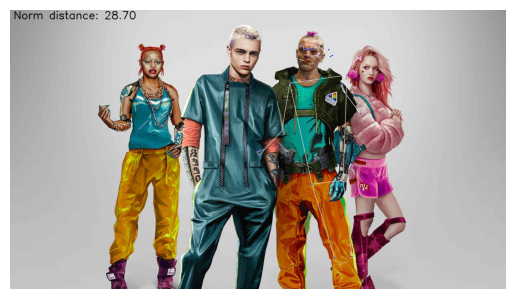

In [139]:
distance = depth_to_distance(nose_z,depth_scale)
cv.putText(
    image,
    "Norm distance: " + str(np.format_float_positional(distance, precision=2)),
    (20,50),cv.FONT_HERSHEY_SIMPLEX,2,(0,0,0),3)

plt.imshow(image, cmap=plt.cm.binary)
plt.axis(False)

(-0.5, 514.5, 298.5, -0.5)

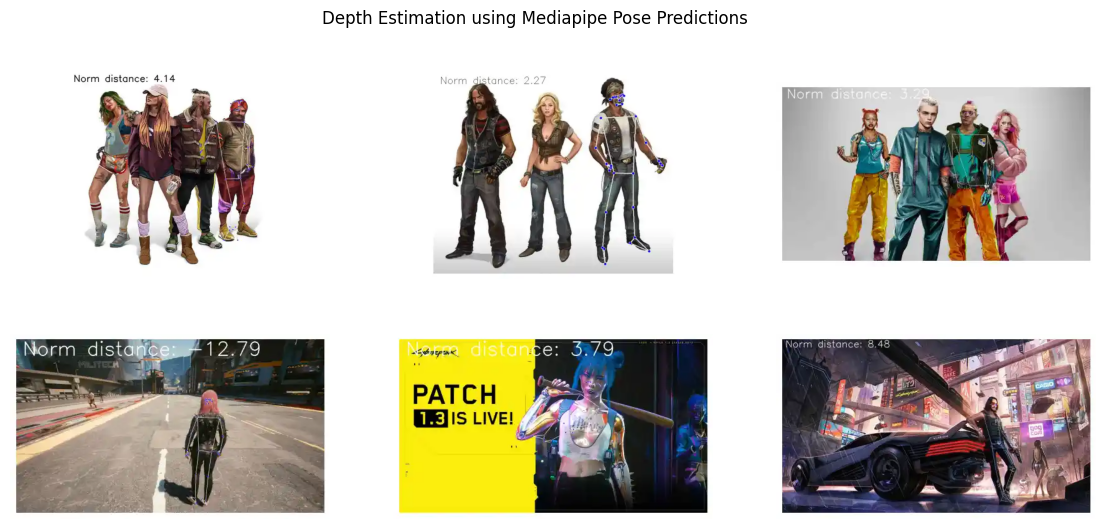

In [129]:
plt.figure(figsize=(14, 6))
plt.suptitle('Depth Estimation using Mediapipe Pose Predictions')

ax = plt.subplot(2, 3, 1)
plt.imshow(plt.imread('assets/pose_2.webp'))
plt.axis(False)

ax = plt.subplot(2, 3, 2)
plt.imshow(plt.imread('assets/pose_3.webp'))
plt.axis(False)

ax = plt.subplot(2, 3, 3)
plt.imshow(plt.imread('assets/pose_4.webp'))
plt.axis(False)

ax = plt.subplot(2, 3, 4)
plt.imshow(plt.imread('assets/pose_5.webp'))
plt.axis(False)

ax = plt.subplot(2, 3, 5)
plt.imshow(plt.imread('assets/pose_6.webp'))
plt.axis(False)

ax = plt.subplot(2, 3, 6)
plt.imshow(plt.imread('assets/pose_7.webp'))
plt.axis(False)